In [1]:
import time 
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

In [5]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
anomaly = np.random.uniform(low=-6, high=6, size=(n_samples, 2))

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
x_ansio = np.dot(X, transformation)
ansio = (x_ansio, y)

varied = datasets.make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.5)
varied = (varied[0], varied[1] + 1)
data = [
    noisy_moons,
    noisy_circles,
    blobs,
    (anomaly, None),
    ansio,
    varied
]



<ipython-input-6-a613e778d292>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap=plt.cm.Paired)


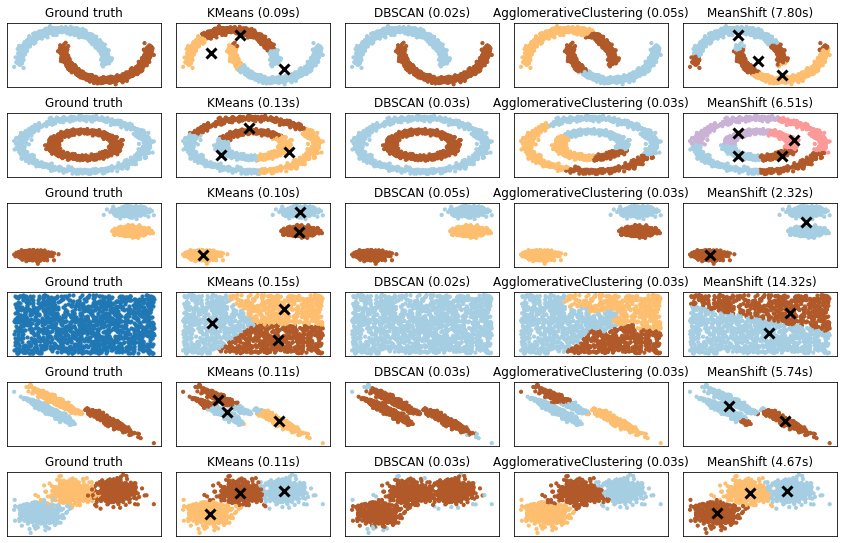

In [ ]:
# set up cluster parameters
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.01, top=0.9, hspace=0.4, wspace=0.1)
n_clusters = 3
clustering_algorithms = (
    (cluster.KMeans, {"n_clusters": n_clusters, "random_state": random_state}),
    (cluster.DBSCAN, {"eps": 0.3, "min_samples": 10}),
    (cluster.AgglomerativeClustering, {"n_clusters": n_clusters}),
    (cluster.MeanShift, {"bandwidth": 1.0}),
)
warnings.filterwarnings("ignore", category=FutureWarning)
for i_dataset, dataset in enumerate(data):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # plot the ground truth
    plt.subplot(len(data), len(clustering_algorithms) + 1, i_dataset * (len(clustering_algorithms) + 1) + 1)
    plt.title("Ground truth")
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())

    # iterate over clustering algorithms
    for i_clustering, (clustering_algorithm, params) in enumerate(clustering_algorithms):
        t0 = time.time()
        clusterer = clustering_algorithm(**params)
        y_pred = clusterer.fit_predict(X)
        t1 = time.time()

        # plot the results
        plt.subplot(len(data), len(clustering_algorithms) + 1,
                    i_dataset * (len(clustering_algorithms) + 1) + i_clustering + 2)
        plt.title(f"{clustering_algorithm.__name__} ({t1 - t0:.2f}s)")
        plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap=plt.cm.Paired)
        plt.xticks(())
        plt.yticks(())
        if hasattr(clusterer, "cluster_centers_"):
            centers = clusterer.cluster_centers_
            plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, linewidths=3,
                        color='k', zorder=10)

plt.show()

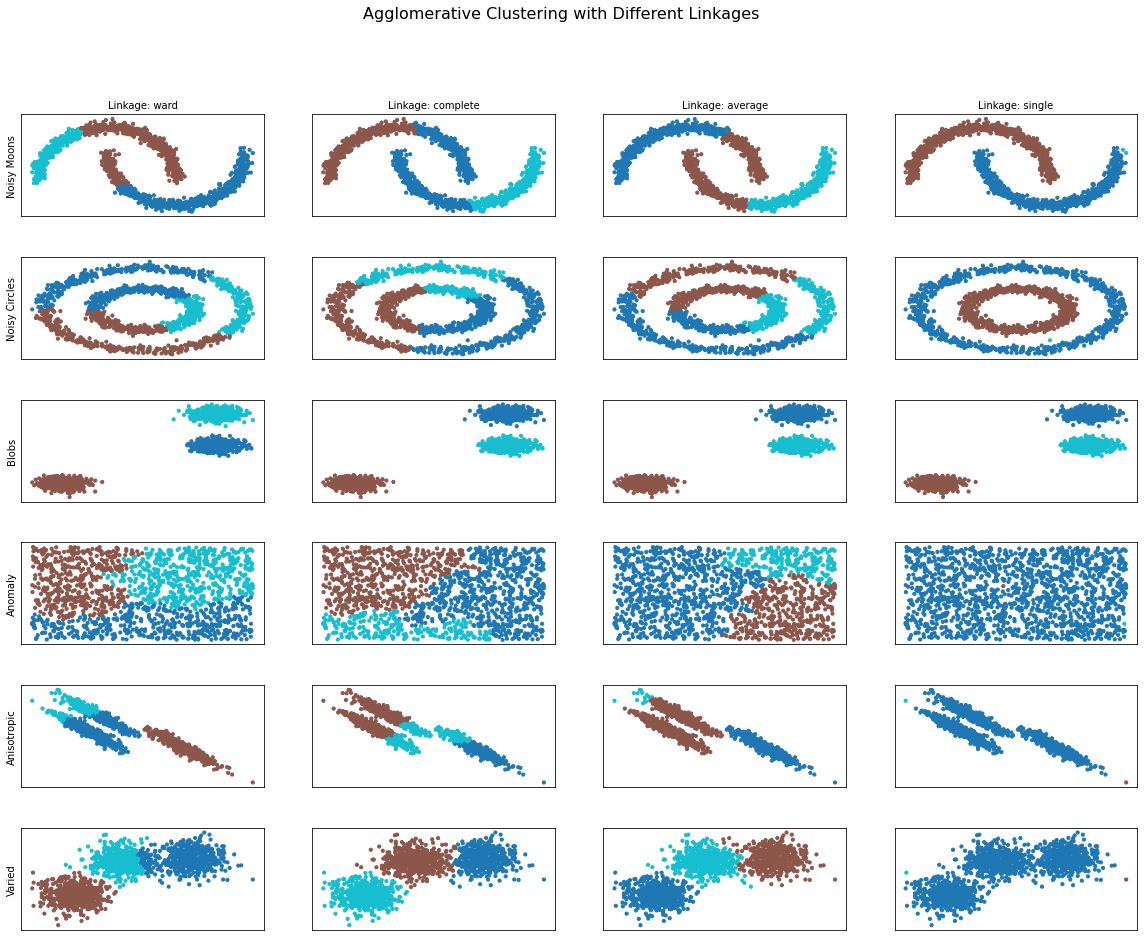

In [ ]:
from sklearn.cluster import AgglomerativeClustering

datasets_list = [
    ("Noisy Moons", noisy_moons),
    ("Noisy Circles", noisy_circles),
    ("Blobs", blobs),
    ("Anomaly", (anomaly, None)),
    ("Anisotropic", ansio),
    ("Varied", varied),
]

linkage_methods = ["ward", "complete", "average", "single"]

# Create subplots
fig, axes = plt.subplots(len(datasets_list), len(linkage_methods), figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for i, (name, (X, _)) in enumerate(datasets_list):
    for j, linkage in enumerate(linkage_methods):
        # Ward requires more than one cluster and Euclidean metric
        if linkage == "ward" and X.shape[1] != 2:
            axes[i, j].text(0.5, 0.5, 'Not supported',
                            horizontalalignment='center',
                            verticalalignment='center',
                            transform=axes[i, j].transAxes)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            continue
        try:
            clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
            y_pred = clustering.fit_predict(X)
        except:
            y_pred = np.zeros(X.shape[0])  # fallback to dummy label if error

        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.tab10, s=10)
        if i == 0:
            axes[i, j].set_title(f'Linkage: {linkage}', fontsize=10)
        if j == 0:
            axes[i, j].set_ylabel(name, fontsize=10)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.suptitle("Agglomerative Clustering with Different Linkages", fontsize=16)
plt.show()
